In [20]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

from importlib import reload  # Python 3.4+

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']

from pygents.util import * 
from pygents.text import * 
from pygents.plot import * 
from pygents.token import * 


In [2]:
# https://www.vengaglobal.com/blog/simplified-traditional-chinese-mandarin-cantonese/

# Target Market  Written      Spoken
# -------------------------------------
# China          Simplified   Mandarin
# Singapore      Simplified   Mandarin
# Taiwan         Traditional  Mandarin
# Hong Kong      Traditional  Cantonese

# Lexicon:
# http://www.chineselexicaldatabase.com/download.php - used below
# Sun, C. C., Hendrix, P., Ma, J.Q. & Baayen, R. H. (2018). Chinese Lexical Database (CLD): A large-scale lexical database for simplified Mandarin Chinese. Behavior Research Methods, https://doi.org/10.3758/s13428-018-1038-3.
# 48644 words

# Corpora:
# https://www.openslr.org/38/ - test-audio corpus, not relevant
# https://github.com/CLUEbenchmark/CLUECorpus2020/ - email request sent
# https://github.com/brightmart/nlp_chinese_corpus - nearly same as above downloaded, used further

# TODO:
# https://metatext.io/datasets/nlp-chinese-corpus - paper with word segmentation


In [ ]:
#TODO

# https://www.plecoforums.com/threads/word-frequency-list-based-on-a-15-billion-character-corpus-bcc-blcu-chinese-corpus.5859/
# 1048575 words



## Lexicon

In [3]:
path = '../../nlp/corpora/Chinese/'

cld_df = pd.read_csv(os.path.join(path,'lexicon/chineselexicaldatabase2.1.txt'))
len(cld_df)

/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3,4,8,9,12,13,17,18,22,23,28,29,111,112,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


48644

In [4]:
cld_df

,Word,C1,C2,C3,C4,Length,C1Structure,C2Structure,C3Structure,C4Structure,...,PSPMI,TScore,PSTScore,C1ConditionalProbability,C12ConditionalProbability,C123ConditionalProbability,C1BackwardConditionalProbability,C12BackwardConditionalProbability,C123BackwardConditionalProbability,EntropyCharacterFrequencies
0,中东,中,东,NaN,NaN,2,SG,SG,NaN,NaN,...,3.8665,-0.4499,6.1560,0.003038,NaN,NaN,0.043024,NaN,NaN,0.8095
1,马队,马,队,NaN,NaN,2,SG,LR,NaN,NaN,...,0.2038,-0.2477,0.0632,0.000725,NaN,NaN,0.000951,NaN,NaN,0.8464
2,门徒,门,徒,NaN,NaN,2,SG,LR,NaN,NaN,...,9.6434,28.4298,86.3191,0.087427,NaN,NaN,0.255630,NaN,NaN,0.3721
3,申讨,申,讨,NaN,NaN,2,SG,LR,NaN,NaN,...,3.7073,-0.0752,0.5747,0.000572,NaN,NaN,0.002027,NaN,NaN,0.8281
4,曲,曲,NaN,NaN,NaN,1,SG,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48639,晓之以理,晓,之,以,理,4,LR,SG,LR,LR,...,-3.6498,-9.8059,-1.0873,1.000000,1.000000,1.0,1.000000,1.0,0.021398,1.4752
48640,人心所向,人,心,所,向,4,SG,SG,LR,HCI,...,-10.8551,-28.8502,-5.2375,0.000748,0.024096,1.0,1.000000,1.0,0.008772,1.3940
48641,门庭若市,门,庭,若,市,4,SG,UD,UD,UD,...,10.7869,0.6575,14.4676,0.444444,1.000000,1.0,1.000000,1.0,0.170213,1.5872
48642,逼良为娼,逼,良,为,娼,4,LRB,SG,SG,LR,...,12.6504,1.1159,24.8872,0.619048,1.000000,1.0,1.000000,1.0,1.000000,0.4557


In [5]:
cld_df[['Word']]


,Word
0,中东
1,马队
2,门徒
3,申讨
4,曲
...,...
48639,晓之以理
48640,人心所向
48641,门庭若市
48642,逼良为娼


## Corpora

In [6]:
#out-of-memory
#news2016zh_valid_df = pd.read_json('data/corpora/chinese/new2016zh/news2016zh_train.json',encoding = 'utf-8-sig', lines=True)
news2016zh_valid_df = pd.read_json(os.path.join(path,'clue/new2016zh/news2016zh_valid.json'),encoding = 'utf-8-sig', lines=True)
len(news2016zh_valid_df)


76797

In [7]:
news2016zh_valid_df

,news_id,keywords,desc,title,source,time,content
0,470308283,借鉴：这篇最受欢迎校训，没有一个字讲学习,“我知道，我不是因为偶然才来到这个世界，我是为了践行一个平凡、美丽、无私的梦想而来的；我是为...,借鉴：这篇最受欢迎校训，没有一个字讲学习,龙乡教育,10-14 21:55,“我知道，我不是因为偶然才来到这个世界，我是为了践行一个平凡、美丽、无私的梦想而来的；我是为...
1,410240504,市民淘宝购物一年四度被忽悠 买货容易退货难,张女士提供豆皮有虫尸的证据照片。受访者供图淘宝上购物，一年被忽悠四次。这样的事情就被市民张女...,市民淘宝购物一年四度被忽悠 买货容易退货难,主流媒体-媒体平台入驻自媒体,03-24 14:13,张女士提供豆皮有虫尸的证据照片。受访者供图淘宝上购物，一年被忽悠四次。这样的事情就被市民张...
2,410933104,[统计]机械.电器类公司市场表现(20150407),@名称代码收盘价日涨跌周涨跌月涨跌季涨跌深华新0000100.0000.00%0.00%0....,[统计]机械.电器类公司市场表现(20150407),移动中金在线,04-08 06:40,@名称代码收盘价日涨跌周涨跌月涨跌季涨跌深华新0000100.0000.00%0.00%0....
3,470124533,[每日一技]四维绕杆跑练习,爱高体育，有趣兼有料的校园足球资讯平台。每日为你分享一招足球技巧！让你更懂得如何运用爱高安全...,[每日一技]四维绕杆跑练习,爱高体育mp,10-12 22:15,爱高体育，有趣兼有料的校园足球资讯平台。每日为你分享一招足球技巧！让你更懂得如何运用爱高安...
4,471705751,【漫展活动】风云小分队在YACA,大家期待已久的yaca万圣动漫音乐节终于来啦，风云动漫社の动物园小分队早早来到了展会现场布置...,【漫展活动】风云小分队在YACA,顺职风云动漫社,10-29 01:07,大家期待已久的yaca万圣动漫音乐节终于来啦，风云动漫社の动物园小分队早早来到了展会现场布...
...,...,...,...,...,...,...,...
76792,411019182,丈母娘强势威逼致女婿抑郁离婚：须上交工资 上报行踪,丈母娘强势致女婿抑郁离婚(图文无关)小伙为了爱情，从南京来到慈溪定居，然而结婚两年，就抑郁离...,丈母娘强势威逼致女婿抑郁离婚：须上交工资 上报行踪,主流媒体-媒体平台入驻自媒体,04-09 11:57,丈母娘强势致女婿抑郁离婚(图文无关)小伙为了爱情，从南京来到慈溪定居，然而结婚两年，就抑郁...
76793,410733265,《非诚》观众上台暴揍男嘉宾 孟非吓呆大喊保安,萧泽轩微博现场扳手腕主持人孟非现场制止“施暴”行为工作人员安慰被打男嘉宾点击图片进入：张丰毅...,《非诚》观众上台暴揍男嘉宾 孟非吓呆大喊保安,主流媒体-媒体平台入驻自媒体,04-02 17:35,萧泽轩微博 现场扳手腕 主持人孟非现场制止“施暴”行为 工作人员安慰被打男嘉宾点击图片进入...
76794,471471887,幼儿学数学智力大篷车学习连加法,幼儿学数学智力大篷车学习连加法,幼儿学数学智力大篷车学习连加法,主流媒体-媒体平台,10-27 04:50,幼儿学数学智力大篷车学习连加法
76795,411050867,商标，万宝山,本报讯（记者陈栋梁）继“林州东岗核桃”、“林州东岗花椒”成功注册地理标志证明商标后，“东岗万...,“东岗万宝山”成功注册涉农商标,豫北新闻,04-10 07:09,本报讯（记者陈栋梁）继“林州东岗核桃”、“林州东岗花椒”成功注册地理标志证明商标后，“东岗万...


In [8]:
def zh_clue_json2text(path,filename):
    with open(os.path.join(path,filename+'.json')) as file:
        with open(os.path.join(path,filename+'.txt'), 'w') as fout:
            while True:
                line = file.readline()
                if not line:
                    break
                j = json.loads(line)
                #print('title',j['title'])
                #print('desc',j['desc'])
                #print('content',j['content'])
                fout.write(j['title'])
                fout.write('\n')    
                fout.write(j['desc'])
                fout.write('\n')    
                fout.write(j['content'])
                fout.write('\n')    


In [9]:
#do this once!
#zh_clue_json2text(path,'clue/new2016zh/news2016zh_valid')


In [10]:
#do this once!
#zh_clue_json2text(path,'clue/new2016zh/news2016zh_train')


In [11]:
#check if context is present
n_counters1 = context_save_load(None,'chinese_news2016zh_valid',folder='data/models/')
len(n_counters1)

3

In [12]:
if n_counters1 is None or len(n_counters1) < 1:
    max_n = 3 # in case of Chinese!?
    n_counters1 = grams_init(max_n)
    cnt = 0
    with open(os.path.join(path, 'clue/new2016zh/news2016zh_valid.txt'),errors='ignore') as f:
        while True:
            line = f.readline()
            if not line:
                break
            cnt += 1
            if (cnt % 1000) == 0:
                print(cnt,line)
            text = preprocess_text(line)
            text_grams_count(n_counters1,text,max_n)
    print(cnt)
    context_save_load(n_counters1,'chinese_news2016zh_valid',folder='data/models/')


In [13]:
dfs = []
for i in range(len(n_counters1)):
    counter = n_counters1[i]
    df = pd.DataFrame([(gram, counter[gram]) for gram in counter],columns=['gram','freq'])
    df['log'] = np.log10(df['freq'])
    df.sort_values('freq',ascending=False,inplace=True)
    df.title = str(1+i)
    dfs.append(df)

In [14]:
dfs[0][:20][['gram','freq']]
# 的 - of
# 是 - yes
# 在 - exist
# 不 - do not

,gram,freq
11,，,3957095
46,的,2551863
94,。,1568778
97,,910603
14,一,870969
475,0,846165
41,、,828054
393,1,782924
26,是,781225
243,在,640088


In [15]:
dfs[1][:20][['gram','freq']]
# 一个 - one
# 公司 - company
# 中国 - china
# 我们 - us/ourselves
# 可以 - can

,gram,freq
1127,20,203160
1414,00,185750
1128,01,136179
139,。,132710
1413,10,126745
14,一个,125311
2459,公司,121123
3395,中国,111429
333,我们,100917
1326,可以,99617


In [16]:
dfs[2][:20][['gram','freq']]
# 自己的 - my own
# ，我们 - , us
# 互联网 - the internet

,gram,freq
1371,201,119476
101621,---,50792
3256,000,41054
5152,016,33741
16435,...,31347
425,自己的,30934
7569,10月,30853
4058,200,30782
1772,015,28768
380,，我们,27576


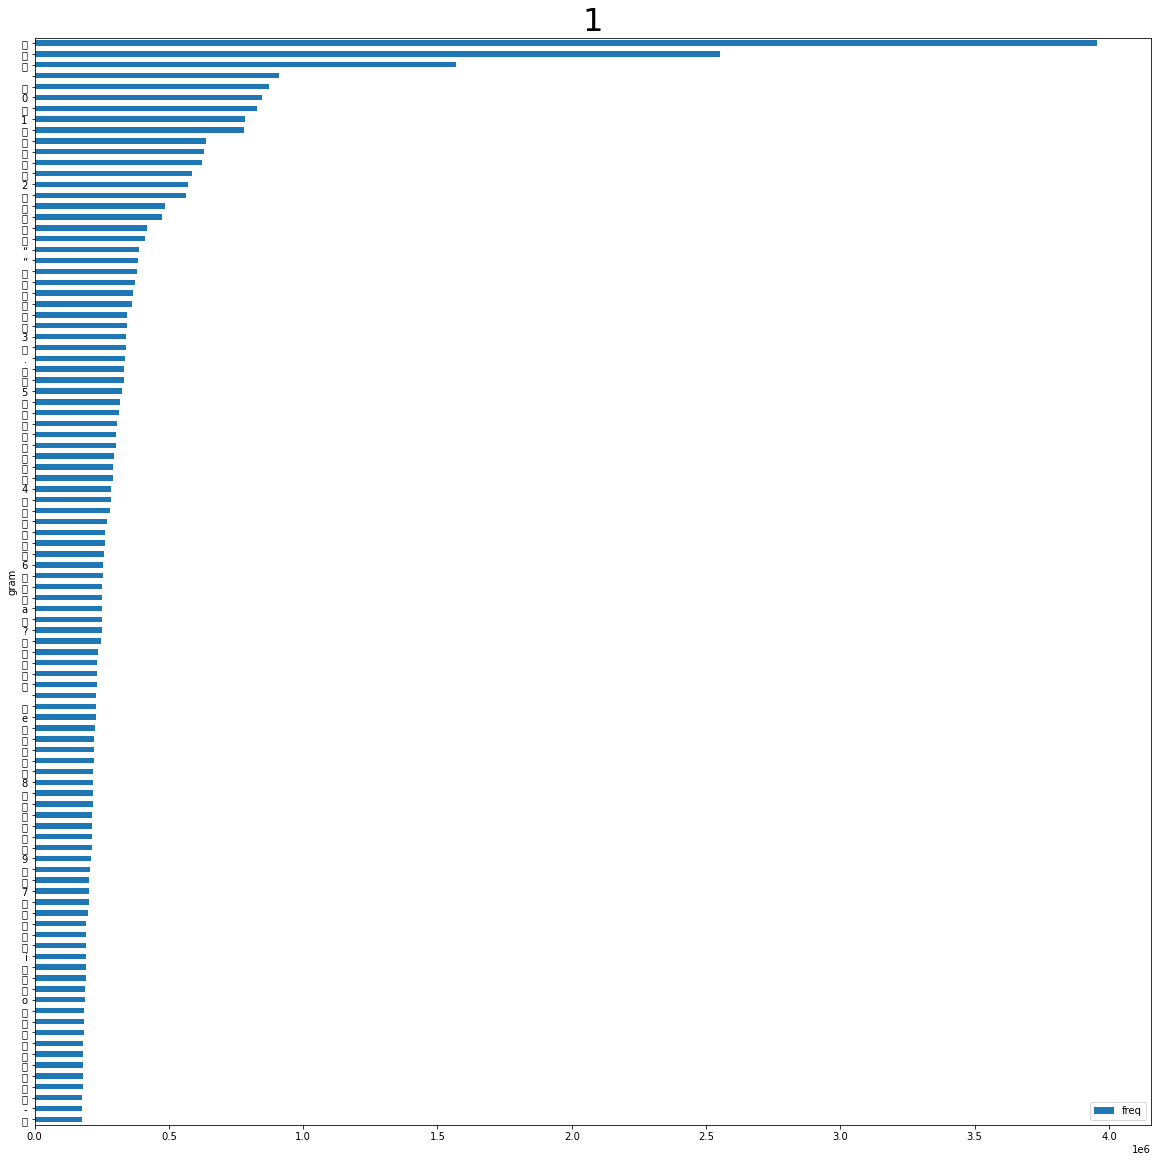

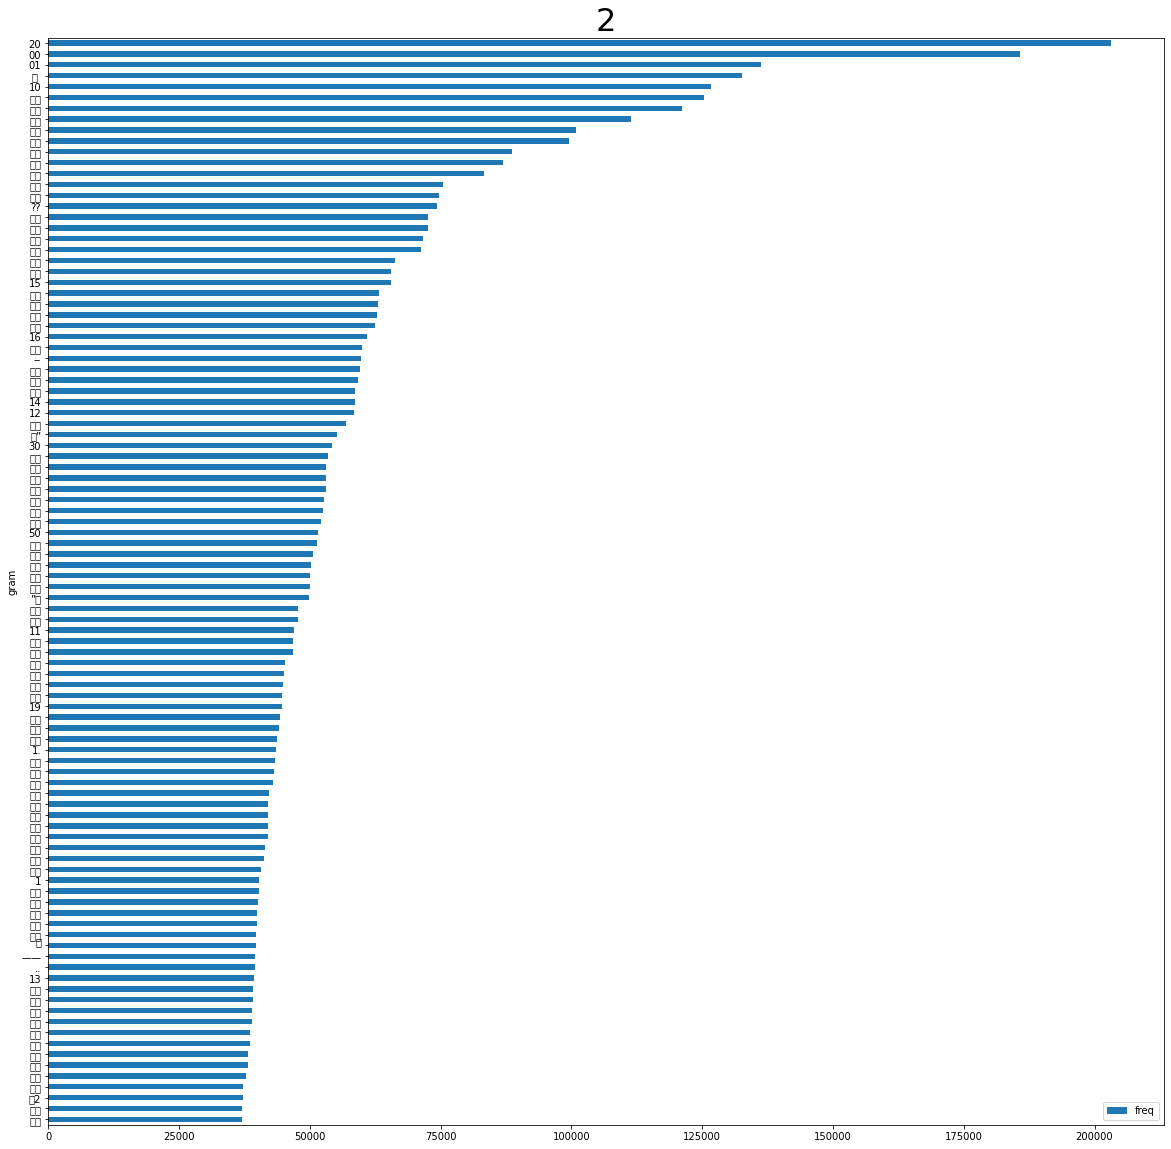

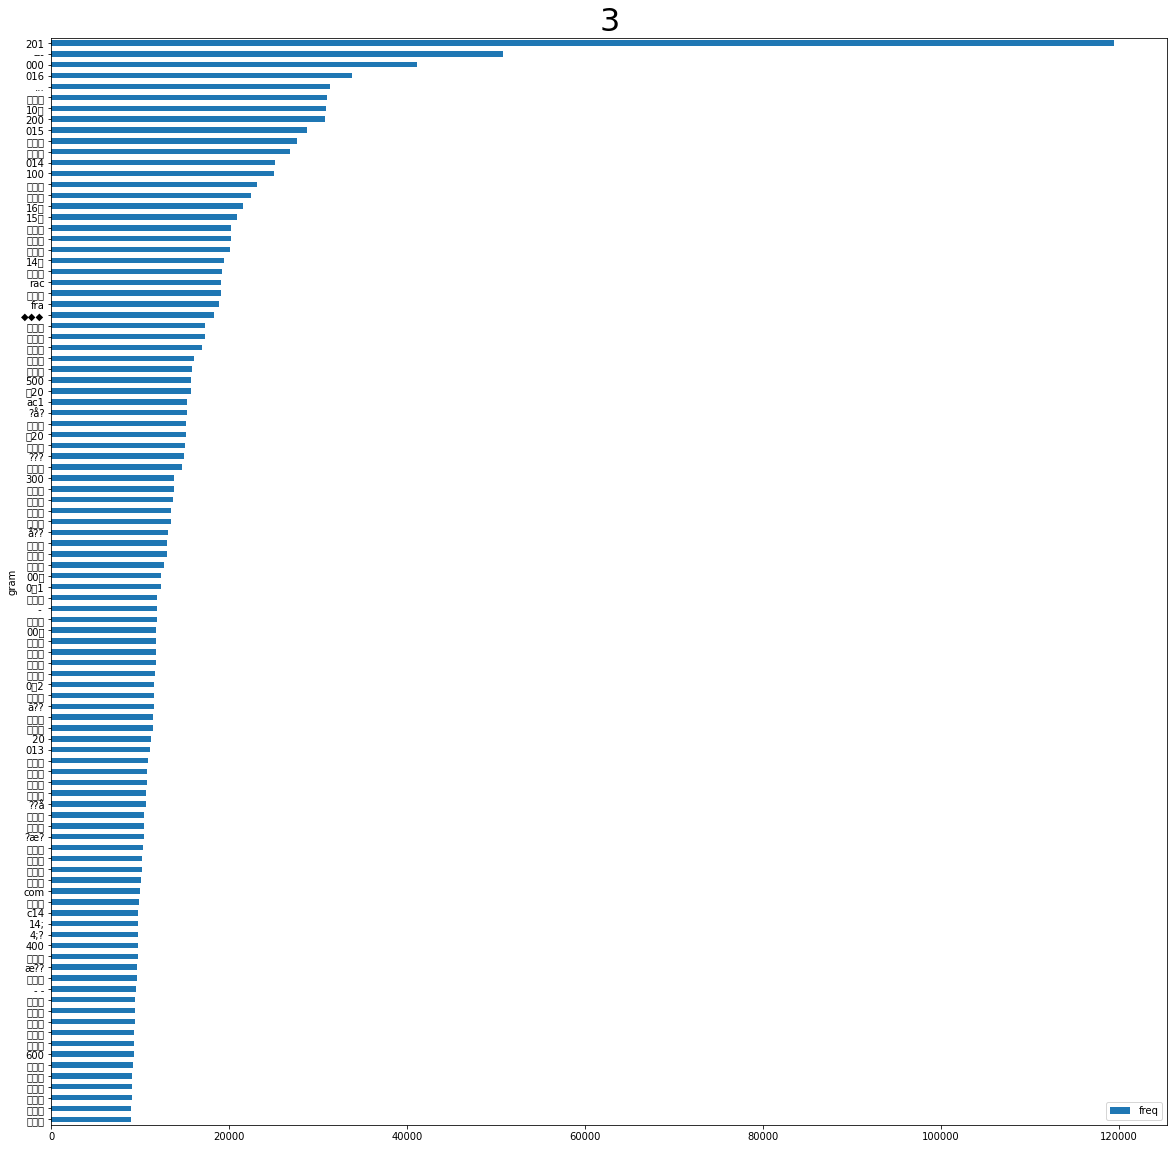

In [19]:
#https://chowdera.com/2022/03/202203280859161240.html

#http://anqin007.blogspot.com/2018/12/show-chinese-characters-in-matplotlib.html
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (20,20)
for df in dfs:
    p = df[:100][['gram','freq']].plot.barh(x='gram'); p.invert_yaxis();
    p.set_title(df.title,fontsize = 32)
    plt.show()

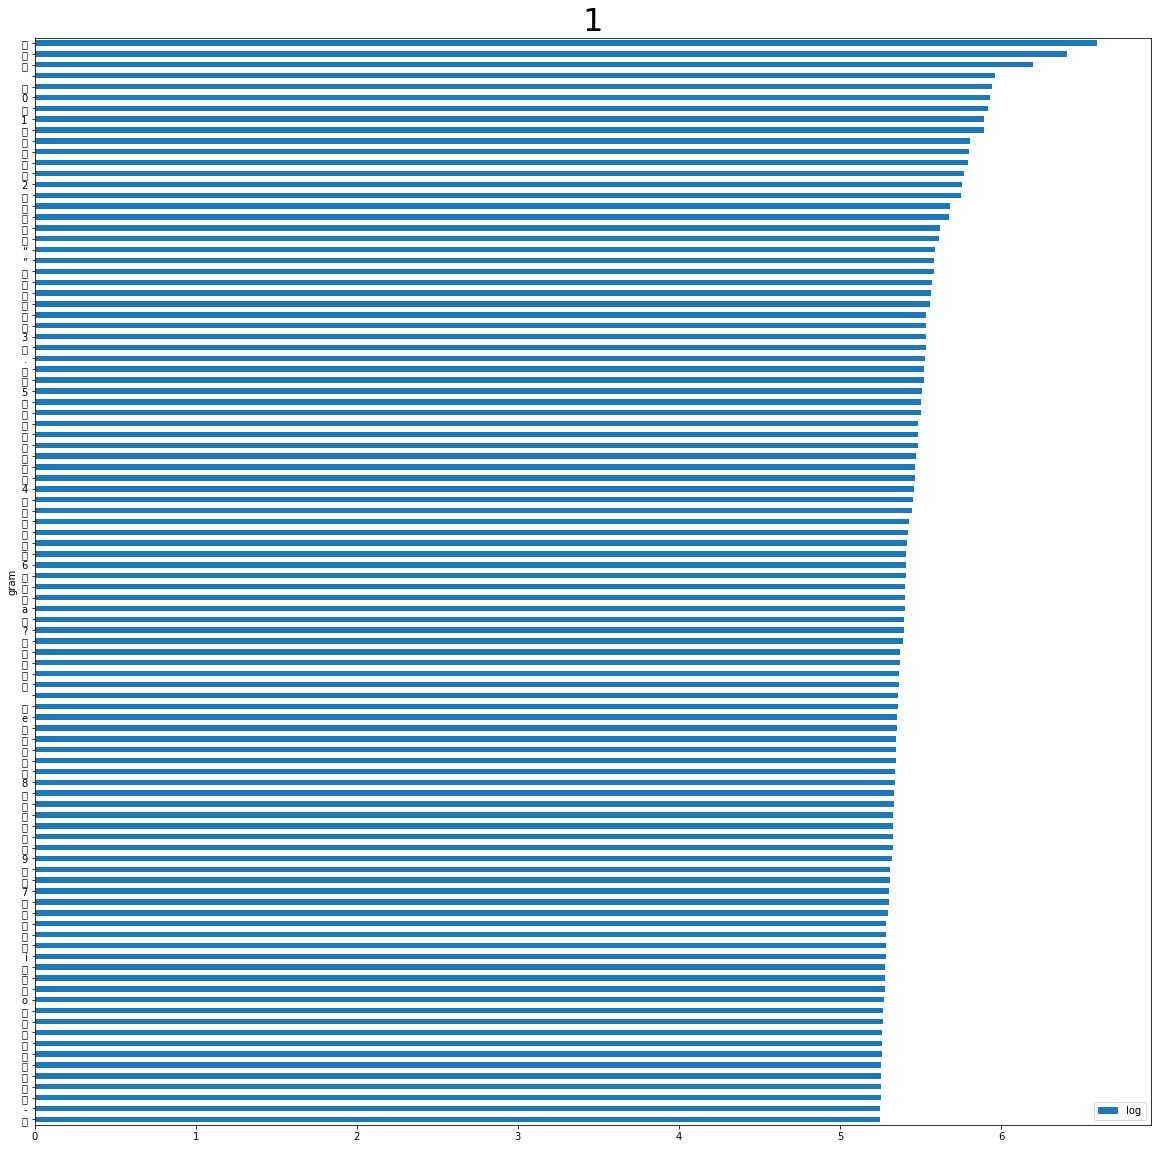

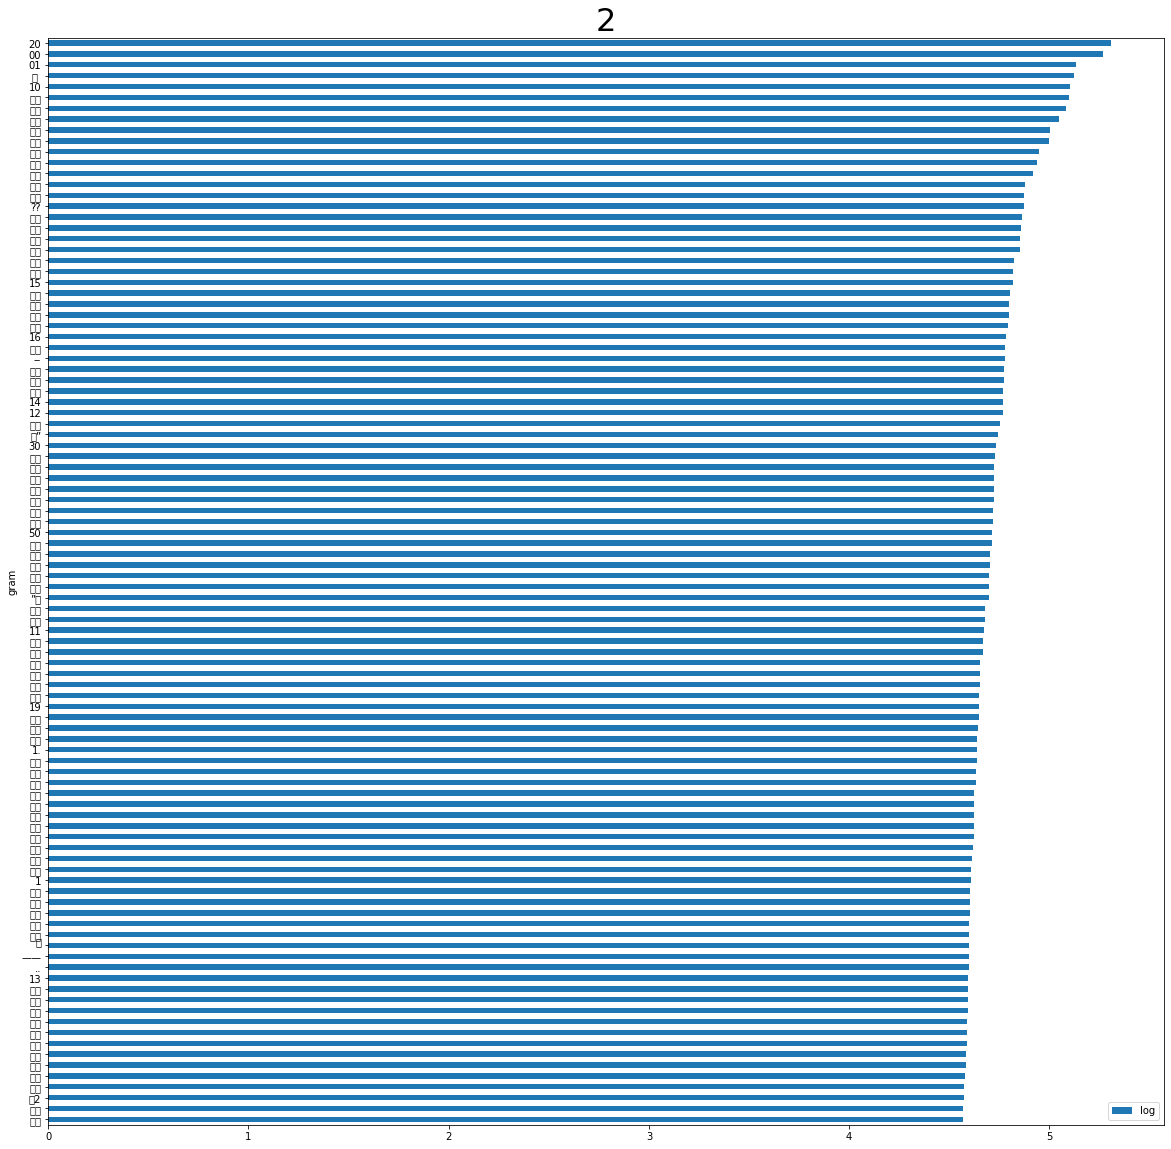

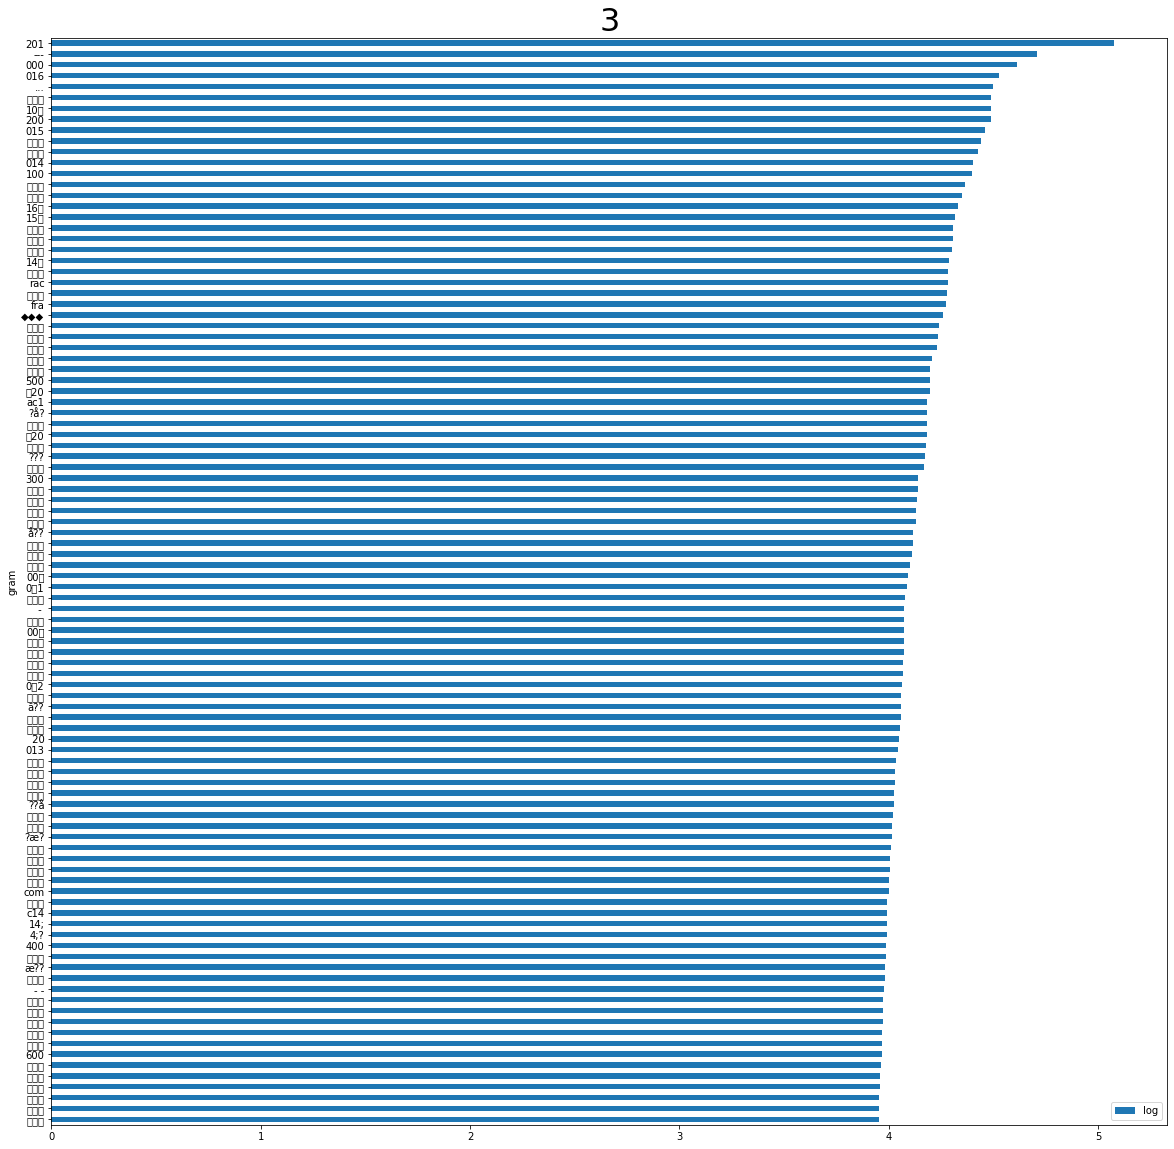

In [18]:
plt.rcParams["figure.figsize"] = (20,20)
for df in dfs:
    p = df[:100][['gram','log']].plot.barh(x='gram'); p.invert_yaxis();
    p.set_title(df.title,fontsize = 32)
    plt.show()